<a href="https://colab.research.google.com/github/bayileyegnabate/03_PyCity_Schools/blob/main/AlphabetSoupCharity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deliverable 1: Preprocessing the Data for a Neural Network

In [ ]:
# Import our dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
#  Import and read the charity_data.csv.
data_file_url = "https://bc-dataviz-bucket11.s3.us-east-2.amazonaws.com/charity_data.csv"
application_df = pd.read_csv(data_file_url)
# change column case
col_names = {f"{col}": col.lower() for col in application_df.columns}
application_df.rename(columns=col_names, inplace=True)
application_df.head()

,ein,name,application_type,affiliation,classification,use_case,organization,status,income_amt,special_considerations,ask_amt,is_successful
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["ein", "name"], axis=1, inplace=True)
application_df.head(10)

,application_type,affiliation,classification,use_case,organization,status,income_amt,special_considerations,ask_amt,is_successful
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [ ]:
# Determine the number of unique values in each column.
application_df.nunique()

application_type            17
affiliation                  6
classification              71
use_case                     5
organization                 4
status                       2
income_amt                   9
special_considerations       2
ask_amt                   8747
is_successful                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
application_df.application_type.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: application_type, dtype: int64

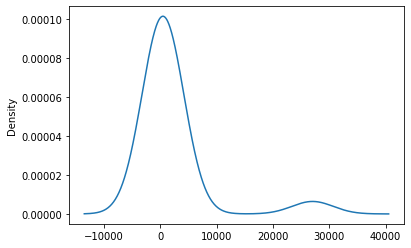

In [ ]:
# Visualize the value counts of APPLICATION_TYPE
application_df.application_type.value_counts().plot.density();

In [ ]:
# Determine which values to replace if counts are less than ...?
app_type_df = pd.DataFrame(application_df.application_type.value_counts())
replace_application = app_type_df[app_type_df.application_type < 500].index

# Replace in dataframe
for app in replace_application:
    application_df.application_type = application_df.application_type.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.application_type.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: application_type, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
application_df.classification.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: classification, Length: 71, dtype: int64

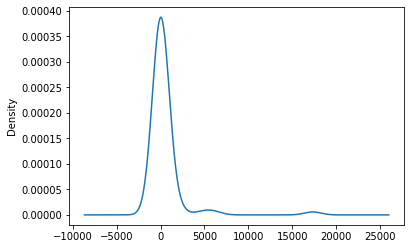

In [ ]:
# Visualize the value counts of CLASSIFICATION
application_df.classification.value_counts().plot.density();

In [ ]:
# Determine which values to replace if counts are less than ..?
class_df = pd.DataFrame(application_df.classification.value_counts())
replace_class = class_df[class_df.classification < 1883].index

# Replace in dataframe
for cls in replace_class:
    application_df.classification = application_df.classification.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.classification.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: classification, dtype: int64

In [ ]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['application_type',
 'affiliation',
 'classification',
 'use_case',
 'organization',
 'income_amt',
 'special_considerations']

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encoded_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encoded_df.columns = enc.get_feature_names_out(application_cat)
encoded_df.head()

,application_type_Other,application_type_T10,application_type_T19,application_type_T3,application_type_T4,application_type_T5,application_type_T6,application_type_T7,application_type_T8,affiliation_CompanySponsored,...,income_amt_1-9999,income_amt_10000-24999,income_amt_100000-499999,income_amt_10M-50M,income_amt_1M-5M,income_amt_25000-99999,income_amt_50M+,income_amt_5M-10M,special_considerations_N,special_considerations_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encoded_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis=1)
application_df.head()

,status,ask_amt,is_successful,application_type_Other,application_type_T10,application_type_T19,application_type_T3,application_type_T4,application_type_T5,application_type_T6,...,income_amt_1-9999,income_amt_10000-24999,income_amt_100000-499999,income_amt_10M-50M,income_amt_1M-5M,income_amt_25000-99999,income_amt_50M+,income_amt_5M-10M,special_considerations_N,special_considerations_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Split our preprocessed data into our features and target arrays
y = application_df.status
X = application_df.drop(columns=["status"])
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
num_hidden_nodes_layer1 = 50
num_hidden_nodes_layer2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=num_hidden_nodes_layer1,
        input_dim=num_input_features,
        activation="relu"
    )
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=num_hidden_nodes_layer2,
        activation="relu"
    )
)

# Output layer
nn.add(
    tf.keras.layers.Dense(
        units=1,
        activation="sigmoid"
    )
)

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2200      
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,761
Trainable params: 3,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# create callback to save model weights
cp_callback = ModelCheckpoint(
    filepath="weights{epoch:08d}.h5",
    verbose=1,
    save_weights_only=True,
    save_freq=5
)

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=[cp_callback])

Streaming output truncated to the last 5000 lines.
Epoch 35: saving model to weights00000035.h5

Epoch 35: saving model to weights00000035.h5
449/804 [===============>..............] - ETA: 2s - loss: 4.1094e-04 - accuracy: 0.9999
Epoch 35: saving model to weights00000035.h5

Epoch 35: saving model to weights00000035.h5
459/804 [================>.............] - ETA: 2s - loss: 4.0472e-04 - accuracy: 0.9999
Epoch 35: saving model to weights00000035.h5

Epoch 35: saving model to weights00000035.h5
469/804 [================>.............] - ETA: 2s - loss: 3.9625e-04 - accuracy: 0.9999
Epoch 35: saving model to weights00000035.h5

Epoch 35: saving model to weights00000035.h5
479/804 [================>.............] - ETA: 2s - loss: 3.8850e-04 - accuracy: 0.9999
Epoch 35: saving model to weights00000035.h5

Epoch 35: saving model to weights00000035.h5
489/804 [=================>............] - ETA: 1s - loss: 8.9364e-04 - accuracy: 0.9998
Epoch 35: saving model to weights00000035.h5

Epo

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 1.8620e-04 - accuracy: 1.0000 - 657ms/epoch - 2ms/step
Loss: 0.00018619604816194624, Accuracy: 1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nn.save_weights("/content/drive/My Drive/AlphabetSoupCharity.h5")
